<a href="https://colab.research.google.com/github/robin88322/sania5/blob/master/Sysan_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DATA_FOLDER = '/content/drive/My Drive/Sisan/Sysan5_data/'
# не забудь поміняти папку

In [0]:
mask = np.array(pd.read_csv(DATA_FOLDER+'mask.csv',delimiter=';',header=None))

In [0]:
alpha_hat_raw = np.array(pd.read_csv(DATA_FOLDER+'alpha_hat.csv',delimiter=';',header=None))
It_hat_raw = np.array(pd.read_csv(DATA_FOLDER+'It_hat.csv',delimiter=';',header=None))
Id_hat_raw = np.array(pd.read_csv(DATA_FOLDER+'Id_hat.csv',delimiter=';',header=None))
Ip_hat_raw = np.array(pd.read_csv(DATA_FOLDER+'Ip_hat.csv',delimiter=';',header=None))

In [0]:
def process_data(array):
    data = array.copy()
    data[data =='-']=-1
    data = data.astype(np.float64)
    return data

In [0]:
alpha_hat = process_data(alpha_hat_raw)
It_hat = process_data(It_hat_raw)
Id_hat = process_data(Id_hat_raw)
Ip_hat = process_data(Ip_hat_raw)

In [8]:
n,m = alpha_hat.shape
print(n,m)

4 7


In [0]:
eta_def = 0.6

In [0]:
def get_eta(i,j):
    """
    int_inf_ind - integral information index
    alpha  - one of coefs that show change dynamic of int_inf_ind
    """
    return 1 - np.log2(1+alpha_hat[i,j]*get_I(i,j)*(7+gamma[i,j]))

In [0]:
def get_I(i,j):
    """
    I_p - level of fullness
    I_t - level of svoechasnist
    I_d - level of dostovirnist
    t - time
    """
    return get_Ip(i,j)*get_It(i,j)*get_Id(i,j)

def get_Ip(i,j):
    res = 10*Ip_hat[i,j]*np.log10(1+alpha[i,j])*(t+1)**2
    if res < 1:
        return res
    return 1

def get_Id(i,j):
    res = (1+0.5*beta[i,j]+gamma[i,j]*t)**2/((1+Id_hat[i,j])**2+0.4*alpha[i,j])
    if res < 1:
        return res
    return 1

def get_It(i,j):
    res = 0.5*It_hat[i,j]*((4+10**-2 * alpha[i,j])*(1-3*beta[i,j]*t**2))
    if 3*beta[i,j]*t**2 < 1:
        return res
    return 0

In [0]:
def get_alpha(i,j):
    return 0.5*(It_hat[i,j]+Ip_hat[i,j]*alpha_hat[i,j])

def get_beta(i,j):
    return np.exp(It_hat[i,j])*10**-4/(1+alpha_hat[i,j])**2

def get_gamma(i,j):
    return 1.5*np.exp(-0.5*(It_hat[i,j]+Id_hat[i,j]))*alpha_hat[i,j]

In [0]:
alpha = np.zeros((n,m))
beta = np.zeros((n,m))
gamma = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        if alpha_hat[i,j] != -1:
            alpha[i,j] = get_alpha(i,j)
            beta[i,j] = get_beta(i,j)
            gamma[i,j] = get_gamma(i,j)
            

In [0]:
t = 0
hist_Ip = []
hist_Id = []
hist_It = []
while True:
    hist_Ip.append(get_Ip(0,0))
    hist_Id.append(get_Id(0,0))
    hist_It.append(get_It(0,0))
    if get_It(0,0) == 0.0: break
    t+=1

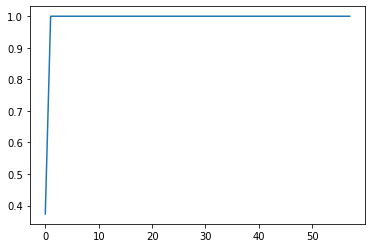

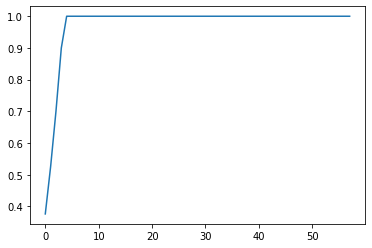

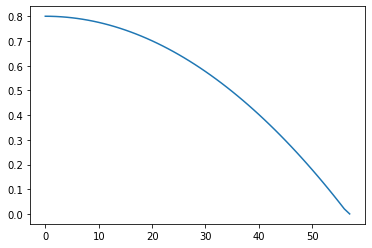

In [15]:
plt.plot(hist_Ip[:])
plt.show()
plt.plot(hist_Id[:])
plt.show()
plt.plot(hist_It[:])
plt.show()

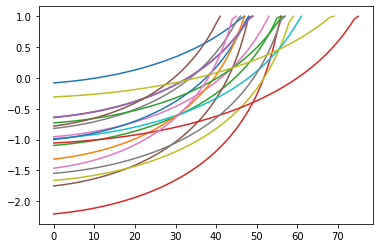

In [16]:
for i in range(n):
    for j in range(m):
        if alpha_hat[i,j] != -1:
            t = 10
            hist_I = []
            while True:
                hist_I.append(get_eta(i,j))
                if get_It(i,j) == 0.0: break
                t+=1
            plt.plot(hist_I)

In [0]:
step = .1

t = 10
T = np.zeros((n,m),dtype=np.float64)
eta_def = 0.6

while t < 100:
    for i in range(n):
        for j in range(m):
            if alpha_hat[i,j] != -1:
                alpha[i,j] = get_alpha(i,j)
                beta[i,j] = get_beta(i,j)
                gamma[i,j] = get_gamma(i,j)
                eta = get_eta(i,j)
                if T[i,j] == 0 and eta > eta_def:
                    T[i,j] = max(t-step,0)
                    
    t += step
    


In [18]:
T

array([[48.2,  0. , 53.9, 62. , 64.5, 54. , 56.4],
       [ 0. , 59.4, 52. ,  0. , 66.3, 67. ,  0. ],
       [ 0. , 54.6, 54.6,  0. , 61.5, 80.1,  0. ],
       [53.9, 47.5, 52.2, 64.1, 69.5,  0. ,  0. ]])

In [0]:
step = .1

T1 = np.zeros((n,m),dtype=np.float64)
T2 = np.zeros((n,m),dtype=np.float64)
eta_plus = 0.6
eta_minus = 0.1
t=20
while t < 100:
    for i in range(n):
        for j in range(m):
            if alpha_hat[i,j] != -1:
                eta = get_eta(i,j)
    
                if T2[i,j] == 0 and eta > eta_plus:
                    T2[i,j] = max(t-step,0)
                if T1[i,j] == 0 and eta > eta_minus:
                    T1[i,j] = max(t-step,0)
                    
    t += step

In [51]:
T1

array([[28.1,  0. , 45.3, 56.1, 62.3, 45.4, 53.6],
       [ 0. , 52.9, 45.4,  0. , 62.7, 59.8,  0. ],
       [ 0. , 48.9, 50.5,  0. , 52.6, 72.1,  0. ],
       [45.3, 41.2, 48.9, 60.2, 50.9,  0. ,  0. ]])

In [52]:
T2

array([[48.2,  0. , 53.9, 62. , 64.5, 54. , 56.4],
       [ 0. , 59.4, 52. ,  0. , 66.3, 67. ,  0. ],
       [ 0. , 54.6, 54.6,  0. , 61.5, 80.1,  0. ],
       [53.9, 47.5, 52.2, 64.1, 69.5,  0. ,  0. ]])

In [22]:
Smax = []
for i in range(n):
    T22 = T2[i]
    Smax.append(np.amax(T22[T22 != 0])) 
print(Smax)

[64.5000000000006, 67.00000000000045, 80.09999999999971, 69.50000000000031]


In [23]:
Smin = []
for i in range(n):
    T11 = T1[i]
    Smin.append(np.amin(T11[T11!=0])) 
print(Smin)

[28.100000000000115, 45.40000000000036, 48.90000000000041, 41.2000000000003]


In [0]:
def get_intervals(eta_plus):
  global alpha_hat
  global alpha
  global beta
  global gamma
  global It_hat
  global Id_hat
  global Ip_hat
  global t
  T1 = np.zeros((n,m),dtype=np.float64)
  T2 = np.zeros((n,m),dtype=np.float64)
  eta_minus = 0.1
  t=20
  step = 0.1
  while t < 100:
      for i in range(n):
          for j in range(m):
              if alpha_hat[i,j] != -1:
                  eta = get_eta(i,j)
                  if T2[i,j] == 0 and eta > eta_plus:
                      T2[i,j] = max(t-step,0)
                  if T1[i,j] == 0 and eta > eta_minus:
                      T1[i,j] = max(t-step,0)
                      
      t += step
  Smax = []
  for i in range(n):
      T22 = T2[i]
      Smax.append(np.amax(T22[T22 != 0])) 
  Smin = []
  for i in range(n):
      T11 = T1[i]
      Smin.append(np.amin(T11[T11 != 0])) 
  return Smin,Smax

In [0]:
def classify(eta):
  Smin, Smax = get_intervals(eta)
  t_minus, t_plus = etta_huinia[eta]
  print("eta: ",eta)
  for i in range(n):
      if (Smin[i]<t_minus):
          print(f"{i} критична херня")
      elif (Smax[i] > t_plus):
          print(f"{i} заебісь херня")
      else: print(f"{i} середня херня")

In [0]:
etta_huinia = {0.5 : [45, 80 ],
               0.6 : [40, 69 ],
               0.7 : [20, 69 ],
               0.8 : [15, 69 ],
               0.9 : [10, 69 ]
              }

In [105]:
etas = [0.5,0.6,0.7,0.8,0.9]
for eta in etas:
  classify(eta)

eta:  0.5
0 критична херня
1 середня херня
2 середня херня
3 критична херня
eta:  0.6
0 критична херня
1 середня херня
2 заебісь херня
3 заебісь херня
eta:  0.7
0 середня херня
1 середня херня
2 заебісь херня
3 заебісь херня
eta:  0.8
0 середня херня
1 заебісь херня
2 заебісь херня
3 заебісь херня
eta:  0.9
0 середня херня
1 заебісь херня
2 заебісь херня
3 заебісь херня


In [84]:
get_intervals(0.5)

([28.100000000000115, 45.40000000000036, 48.90000000000041, 41.2000000000003],
 [64.10000000000062, 65.80000000000052, 78.79999999999978, 66.60000000000048])